# DIT821 Software Engineering for AI systems - exam 2020-08-17


### Assignement: find optimal number of cluster


* Name, e-mail:

#### Task description
Your assignment is to find clusters of data. You will have a dataset with m examples characterized by n features, and you have to find the optimal number of clusters. 

The specific of the assignment is the following.
The number of features n=3, and you can assume that the features represent the space coordinates, x,y, and z, where z denotes a height. Assume that your cost is related to moving in the space, and the cost is proportional to the distance from a centroid to the object. However, the cost for moving up and down (i.e. changing z-coordinate) costs 2 times than moving on the same height (i.e. for dx = x1-x2, dz=z1-z2, and dx = dz, the cost C(dz) = 2*C(dx).

In this assignment you should
1) run a code that creates a dataset (coordinates of the objects)
2) provide the K-algorithm for n clusters assuming the cost conditions
3) provide an algorithm in which you will test which costs you will have for different number of clusters (1-50) and based on the results you should select the most appropriate number of clusters

#### execute next cell

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Optimization module in scipy
from scipy import optimize

# Plotting library
from matplotlib import pyplot

import random
import utils

#### generate dataset (semirandom generation) - execute the code in the next cell

In [2]:
#this code creates the dataset with semi-random values for data. We have 1000 objects with 3 features (x,y,z)

m = 500 # number of exampls
n = 3 # number of features/dimensions

# generate dataset X 
X = np.zeros((m, n))
k1 = int(m/10)
k2 = int(m/5)
for i in range(10):
    X[(k1*i):((i+1)*k1),0]  = [random.gauss(10*i, 10) for _ in range(k1)]
for i in range(5):
    X[(k2*i):((i+1)*k2),1]  = [random.gauss(50*i, 20) for _ in range(k2)]
X[:,2] = [random.gauss(20, 30) for _ in range(m)]

print(X)

[[ -9.69490782 -11.02257549 -24.2441127 ]
 [ -8.09619063   8.02470033 -17.70367649]
 [ -1.09985952 -29.86781586  19.01046623]
 ...
 [ 91.23559447 193.34535788  22.89179889]
 [ 89.96758718 214.6683464  -60.88099905]
 [ 84.751726   212.44872016  10.89077927]]


#### Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the algorithm assigns every training example $x^{(i)}$ to its closest centroid, given the current positions of centroids. Specifically, for every example $i$ we set

$$c^{(i)} := j \quad \text{that minimizes} \quad \lvert\rvert x^{(i)} - \mu_j  \lvert\rvert^2, $$

where $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$, and $\mu_j$ is the position (value) of the $j^{th}$ centroid. Note that $c^{(i)}$ corresponds to `idx[i]` in the starter code.

I this assignement you will try to find the optimal number of clusters  for given objects that are defined by three features, that you can undersand as space coordinate : $x^{(i)}$ correponds to the space coordinates x,y,z.) 

The first task is to update the code in the function `findClosestCentroids`. This function takes the data matrix `X` and the locations of all centroids inside `centroids` and should output a one-dimensional array `idx` that holds the index (a value in $\{1, ..., K\}$, where $K$ is total number of centroids) of the closest centroid to every training example.

#### Note however that you have take into account that the cost for the z distance is 2 times larger than the cost for the same distance for x and y. 

In [3]:
def findClosestCentroids(X, centroids):
    """
    Computes the centroid memberships for every example.
    
    Parameters
    ----------
    X : array_like - The dataset of size (m, n) where each row is a single example. That is, we have m examples each of n dimensions.
        
    centroids : array_like - The k-means centroids of size (K, n). K is the number of clusters, and n is the the data dimension.
    
    Returns
    -------
    idx : array_like - A vector of size (m, ) which holds the centroids assignment for each example (row) in the dataset X.
    
    """
   
    # You need to return the following variables correctly.
    idx = np.zeros(X.shape[0], dtype=int)

    K = centroids.shape[0]
    m = X.shape[0]  # number of elements
    temp = np.zeros((centroids.shape[0],1))

    for i in range (m):
        for j in range (K):
            dis_ij = X[i,:] - centroids[j,:] # distance for each feature for  ith case and j centroid
            dist = np.sum(dis_ij**2) # distance/norm 
            temp[j] = dist # save dist for each centroid
            idx[i] = np.argmin(temp)  # find element with a minium distance for all centroids. 
            
    return idx



 

<a id="section2"></a>
### 1.1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Specifically, for every centroid $k$ we set

$$ \mu_k := \frac{1}{\left| C_k\right|} \sum_{i \in C_k} x^{(i)}$$

where $C_k$ is the set of examples that are assigned to centroid $k$. Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k = 2$, then you should update $\mu_2 = \frac{1}{2} \left( x^{(3)} + x^{(5)} \right)$.

#### Note however that the distace along z-coordinate, costs 2 times more 


In [4]:
def computeCentroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points assigned to each centroid.
    
    Parameters
    ----------
    X : array_like - The datset where each row is a single data point. That is, it  is a matrix of size (m, n) where there are m datapoints each
        having n dimensions. 
    
    idx : array_like 
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1]) for each example.
    
    K : int Number of clusters
    
    Returns
    -------
    centroids : array_like - A matrix of size (K, n) where each row is the mean of the data points assigned to it
    with the assumption that for n=3 (i.e. z coordinate) you will have double cost for the distance
    

    """
    # Useful variables
    m, n = X.shape
    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))
    
    count = np.zeros((K,1))
    
    for i in range(m):
        n_centriod = idx[i]
        centroids[n_centriod,:] =  centroids[n_centriod,:] +X[i,:]
        count[n_centriod] = count[n_centriod] + 1
    
    centroids = centroids/count
    
    return centroids

### Random initialization 
This code pickup randomly values of K cetroids. you should use it whne you create initaial centroids. you will use this fuction to initalise the centroids

In [5]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to be used in K-means on the dataset x.
    
    Parameters
    ----------
    X : array_like  The dataset of size (m x n).
    K : int The number of clusters.
    
    Returns
    -------   centroids : array_like Centroids of the clusters. This is a matrix of size (K x n).
    """
    m, n = X.shape
    centroids = X[np.random.choice(m, K, replace=False)]
  
    return centroids

#### Calculate cost for each cetroid
Here you will calculate the cost for each centroid and the total costs for all centroids. A cost of a single object corresponds to  a squared distances (norm) from the centroid to the object in the cluster, with the assumption that cost for the z-distance is 2 times of the norm suqered distance). A cost for a cluster is a sum of costs of all objects in the cluster. A total cost of clusters is a sum of a costs foe clusters.

In [6]:
def clusterCosts (X, idx, centroids):
    """
    Returns the costs for centroids as a sum of distances (assuing 2 times distance of z-coordinate)
    
    Parameters
    ----------
    X : array_like - The dataset where each row is a single data point. That is, it  is a matrix of size (m, n) where there are m datapoints each
        having n dimensions. 
    
    idx : array_like 
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1]) for each example.
    
    centroids : matrix (K,n) where K is the number of clusters, and n is a dimesion of a centroid
    
    Returns
    -------
    centroidCost : array_like - A vector of size (K, ) where each element is a cost for each cetroid
    
    """
    K = centroids.shape[0] #number of centroids
    m = X.shape[0]  # number of elements
    centroidCost = np.zeros(K)
    
    print(K)
    #================================YOUR CODE HERE ============================================
   
    for i in range(K):
        tempCost = 0
        for j in range(m):
            if (i==idx[j]):
                normDistance = np.sqrt(np.power((centroids[i:i+1,:1]-X[j:j+1,:1]),2)+np.power((centroids[i:i+1,1:2]-X[j:j+1,1:2]),2))
                tempCost += normDistance + (2*normDistance)
        
        centroidCost[i] = tempCost
        
    
    #===========================================================================================
         
    return centroidCost     
  

Once you have completed the code in `computeCentroids`, the following cell will run your code and output the centroids after the first step of K-means.

#### Creating centroits and calcilating the costs
In the next cell you will write a code to estimte the best number of centrids between 2 and 50. For each number of centroids you should calculate the cost (that corresponds to sum of distances, assuming that z-distance costs 2 times.
Concretly you should do

* create a loop with variation of number of centroids (clusters)
* in the loop you should
    - create a corresponding number of clusters using kMeansInitCentroids function
    - find the centroids
    - calculate the total cost for each set of clusters

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
[108318.67776957  62851.81857037  56154.41437351  53653.49140415
  74515.11631942  46455.63894768  36565.41791613  33617.74743188
  31610.14860173  36221.47189008  36159.30454897  28159.09308176
  43990.26854282  29941.78338983  31191.7538714   28613.48717288
  27608.50772228  30047.34053649  29593.0934393   26908.54204346
  26748.55104222  25782.77897187  32348.16806696  26781.02442928
  23766.84097299  24344.70290426  25948.45810455  24050.58736107
  23627.75962073  24659.61873949  23095.56493759  22732.05868211
  22508.40352373  20752.64319104  21577.6934593   20742.52755384
  23295.81675268  21764.54615411  20752.30778911  23406.88001683
  21449.8911154   20021.60987902  21549.25491522  19850.78310838
  21022.57691172  19333.84071728  20030.29412858  19145.78340469
  20304.9773017   19100.5251318 ]


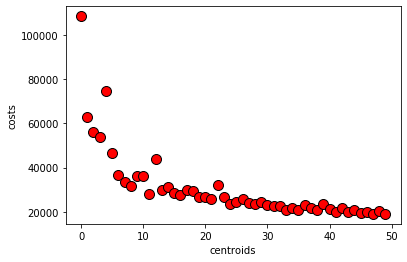

In [7]:
# loop for the clusters 


maxC = 50 # test for up to 50 clusters
costK =np.zeros(maxC) # costs for each number of clusters 
#====================YOUR CODE HERE ========================



for n_clusters in range(1,maxC+1):
    #initialize the centroids in the beginning
    init_centroids = kMeansInitCentroids(X,n_clusters)
#     print(init_centroids)
    
    # Find the closest centroids for the examples using the initial_centroids
    idx = findClosestCentroids(X, init_centroids)
    
#     centroids, idx, _ = utils.runkMeans(X, init_centroids, findClosestCentroids, computeCentroids, 2, True)
    
    #compute cost 
    costK [n_clusters-1] = np.sum(clusterCosts (X, idx, init_centroids))


# ==================================================================   
# this sequence prints and plots the costs in realted to number of clusters 
print (costK)
pyplot.plot(range(maxC), costK, 'ro', ms=10, mec='k', mew=1)
pyplot.xlabel('centroids')
pyplot.ylabel('costs');

#### Based on the graph decide which number of clusters would be the most appropriate. Explain your choice

## Submit the solution

When you completed the excercise, download (form File menu) this file as a jupyter Notebook file (.ipynb) and uplaod this file in the CANVAS 

*By writing down my name I declare that I have done the assignements myself

* First Name  Last Name: